### student_ID_1 = 011996279
### student_ID_2 = 207576463

# Imports

In [1]:
import random
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn.ensemble import AdaBoostClassifier as abc 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

random.seed(207576463)

## Utils

In [2]:
# Function to calculate the percentage of total that each class / label represents 
def calc_class_percentage(num_classes, labels):
    total_len = len(labels)
    for i in range(num_classes):
        class_samples = len(np.where(labels == i)[0])
        class_percentage = class_samples / total_len
        print(f'Class {i} is {class_percentage:.2%} of the data')

In [3]:
def plot_decision_boundaries(ax, X, y, clf, feature_names, title, resolution=0.01):
    # Plot the decision surface
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(X)

    # Generate a meshgrid for visualization
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, resolution), np.arange(y_min, y_max, resolution))

    X_reduced_inverse = pca.inverse_transform(np.c_[xx1.ravel(), xx2.ravel()])

    Z = clf.predict(X_reduced_inverse)
    Z = Z.reshape(xx1.shape)
    
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap = plt.cm.bwr)
    
    # Plot class sample
    ax.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y, s=50, edgecolors='k', cmap = plt.cm.bwr)
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_title(title)

## Part 0: Generate Datasets
1) Generate at least two datasets with one binary label.

2) Split the data to train and test sets

3) Visualize the data (You can use dimensionality reduction if needed)

In [4]:
# First, we generate 3 distinct datasets with binary labels, distinguising them by degree of separation between clusters
seed = 207576463
# Dataset 1: Well-separated clusters
data1, labels1 = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=seed, class_sep=3)

# Dataset 2: Partially overlapping clusters
data2, labels2 = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=seed, class_sep=1.5)

# Dataset 3: Highly overlapping clusters
data3, labels3 = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=seed, class_sep=0.5)

# Next, we split the datasets into train & test sets

train_data1, test_data1, train_labels1, test_labels1 = train_test_split(data1, labels1, test_size=0.2, random_state=seed//10)
train_data2, test_data2, train_labels2, test_labels2 = train_test_split(data2, labels2, test_size=0.2, random_state=seed//10)
train_data3, test_data3, train_labels3, test_labels3 = train_test_split(data3, labels3, test_size=0.2, random_state=seed//10)

#### Data Exploration & Characterizations:

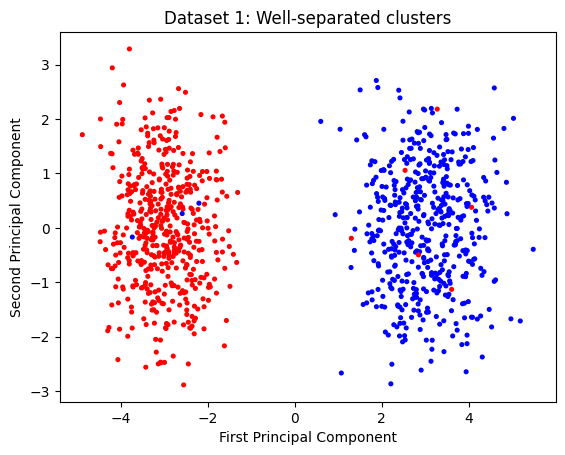

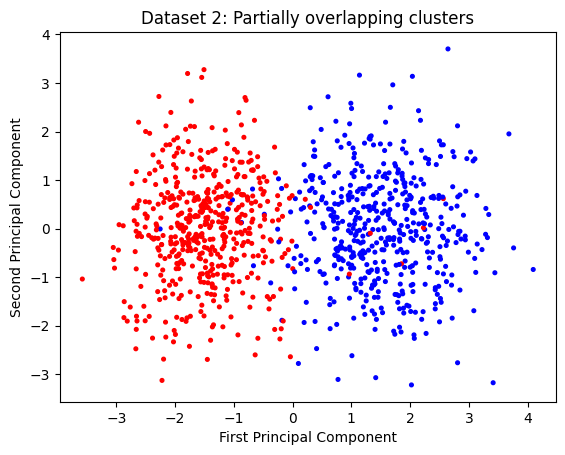

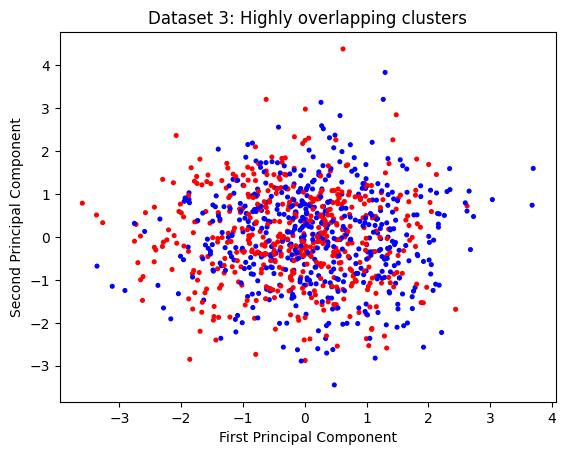

In [5]:
# Here we visualize the datasets using PCA and plot the first two principal components:

def plot_data(data, labels, title):
    pca = PCA(n_components=5)
    reduced_data = pca.fit_transform(data)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, label=labels, cmap=plt.cm.bwr, s=7)
    plt.title(title)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()

plot_data(data1, labels1, 'Dataset 1: Well-separated clusters')
plot_data(data2, labels2, 'Dataset 2: Partially overlapping clusters')
plot_data(data3, labels3, 'Dataset 3: Highly overlapping clusters')


In [6]:

# Print the shapes of the data

print('train & test data sizes for dataset #1:\n')
print('X_train1 shape:', train_data1.shape)
print("y_train1 shape:", train_labels1.shape)
print("X_test1 shape:", test_data1.shape)
print("y_test1 shape:", test_labels1.shape)

print('\ntrain & test data sizes for dataset #2:\n')
print('X_train2 shape:', train_data2.shape)
print("y_train2 shape:", train_labels2.shape)
print("X_test2 shape:", test_data2.shape)
print("y_test2 shape:", test_labels2.shape)

print('\ntrain & test data sizes for dataset #3:\n')
print('X_train3 shape:', train_data3.shape)
print("y_train3 shape:", train_labels3.shape)
print("X_test3 shape:", test_data3.shape)
print("y_test3 shape:", test_labels3.shape)


train & test data sizes for dataset #1:

X_train1 shape: (800, 20)
y_train1 shape: (800,)
X_test1 shape: (200, 20)
y_test1 shape: (200,)

train & test data sizes for dataset #2:

X_train2 shape: (800, 20)
y_train2 shape: (800,)
X_test2 shape: (200, 20)
y_test2 shape: (200,)

train & test data sizes for dataset #3:

X_train3 shape: (800, 20)
y_train3 shape: (800,)
X_test3 shape: (200, 20)
y_test3 shape: (200,)


#### Distribution of Binary Labels in Generated Data:

In [7]:
print('Dataset 1:')
calc_class_percentage(2, train_labels1)
print('-'*20)
print('Dataset 2:')
calc_class_percentage(2, train_labels2)
print('-'*20)
print('Dataset 3:')
calc_class_percentage(2, train_labels3)

Dataset 1:
Class 0 is 48.62% of the data
Class 1 is 51.38% of the data
--------------------
Dataset 2:
Class 0 is 48.62% of the data
Class 1 is 51.38% of the data
--------------------
Dataset 3:
Class 0 is 48.62% of the data
Class 1 is 51.38% of the data


## Part 1: Gradient Boosting Regression Trees (GBRT)
4) Implement GBRT

    a) Loss function

    b) Residuals calculation

    c) Weak regression tree

    d) Boosting step

5) Demonstrate your GBRT model on the datasets you generated

6) Design and perform experiments to test the performance of your model. Present and discuss the results of the experiments.


### GBRT Tuning & sklearn run: 

In [8]:
# Here we define a function to perform cross-validation and hyperparameter tuning using grid search (using the sklearn library first)

def tune_gbrt_model(train_data, train_labels):
    param_grid = {
        'n_estimators': [5, 10, 20, 23],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [2, 3, 4]
    }
    gbrt = gbc(random_state=seed)
    grid_search = GridSearchCV(gbrt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(train_data, train_labels)
    return grid_search.best_estimator_

# Next, we train and evaluate the GBRT model for each dataset (again using the sklearn class):

def train_and_evaluate_gbrt(train_data, test_data, train_labels, test_labels, dataset_name):
    gbrt = tune_gbrt_model(train_data, train_labels)
    train_accuracy = accuracy_score(train_labels, gbrt.predict(train_data))
    test_accuracy = accuracy_score(test_labels, gbrt.predict(test_data))
    print(f"{dataset_name} - GBRT (sklearn) Model")
    print(f"Best parameters: {gbrt.get_params()}")
    print(f"Train accuracy: {train_accuracy:.2f}")
    print(f"Test accuracy: {test_accuracy:.2f}\n")

train_and_evaluate_gbrt(train_data1, test_data1, train_labels1, test_labels1, 'Dataset 1')
train_and_evaluate_gbrt(train_data2, test_data2, train_labels2, test_labels2, 'Dataset 2')
train_and_evaluate_gbrt(train_data3, test_data3, train_labels3, test_labels3, 'Dataset 3')

# In this part, we implemented the GBRT model using sklearn's class and applied it to the three datasets. 
# We performed cross-validation and hyperparameter tuning using grid search to find the best combination of parameters. 
# We calculate and show the train & test accuracies for each dataset, which demonstrates how the performance of the GBRT model 
    # is affected by the degree of separation between the two classes in each dataset.

Dataset 1 - GBRT (sklearn) Model
Best parameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 5, 'n_iter_no_change': None, 'random_state': 207576463, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Train accuracy: 0.99
Test accuracy: 0.98

Dataset 2 - GBRT (sklearn) Model
Best parameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.01, 'loss': 'log_loss', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_iter_no_change': None, 'random_state': 207576463, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 've

### Manual / custom GBRT implementation: 

In [9]:
class CustomGBRT:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []

    def _compute_residuals(self, y_true, y_pred):
        return y_true - y_pred

    def _initial_model(self, size):
        return np.zeros(size)

    def fit(self, X, y):
        self.models = []
        y_pred = self._initial_model(y.shape)
        for _ in range(self.n_estimators):
            residuals = self._compute_residuals(y, y_pred)
            model = DecisionTreeRegressor(max_depth=self.max_depth)
            model.fit(X, residuals)
            y_pred += self.learning_rate * model.predict(X)
            self.models.append(model)
        return self

    def predict(self, X):
        y_pred = self._initial_model(X.shape[0])
        for model in self.models:
            y_pred += self.learning_rate * model.predict(X)
        return np.round(y_pred).astype(int) # classifying each sample as either 0 or 1 for the binary classes

    def score(self, X, y):
        y_pred = self.predict(X)
        return mean_squared_error(y, y_pred)
    
    def get_params(self, deep = True):
        out = dict()
        for key in ['n_estimators', 'learning_rate', 'max_depth']:
            value = getattr(self, key)
            out[key] = value
        return out

    def set_params(self, **params):
        if not params:
            # Simple optimization to gain speed (inspect is slow)
            return self
        valid_params = self.get_params()

        for key, value in params.items():
            if key not in valid_params.keys():
                raise ValueError(
                    f"Invalid parameter {key!r} for estimator {self}. "
                    f"Valid parameters are: {valid_params.keys!r}."
                )
            exec(f"self.{key}={value}")

        return self        

Dataset 1 - Custom GBRT Model
Train accuracy: 1.00
Test accuracy: 0.98



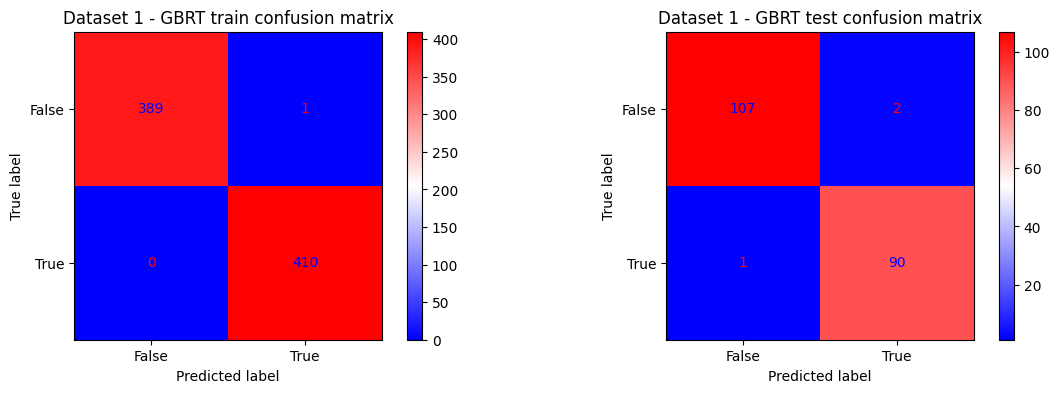

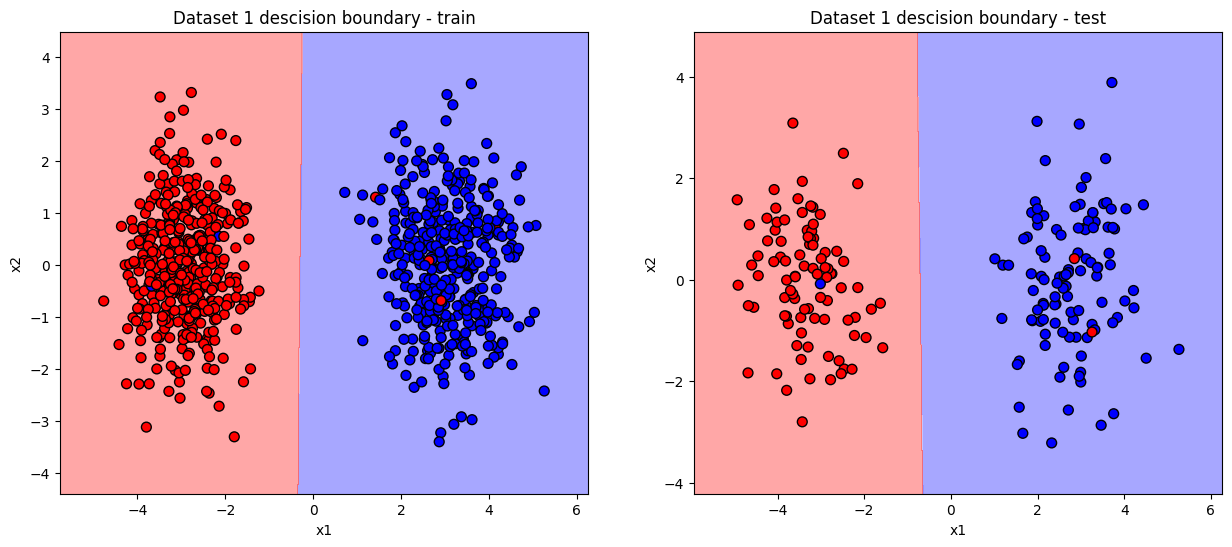

Dataset 2 - Custom GBRT Model
Train accuracy: 1.00
Test accuracy: 0.96



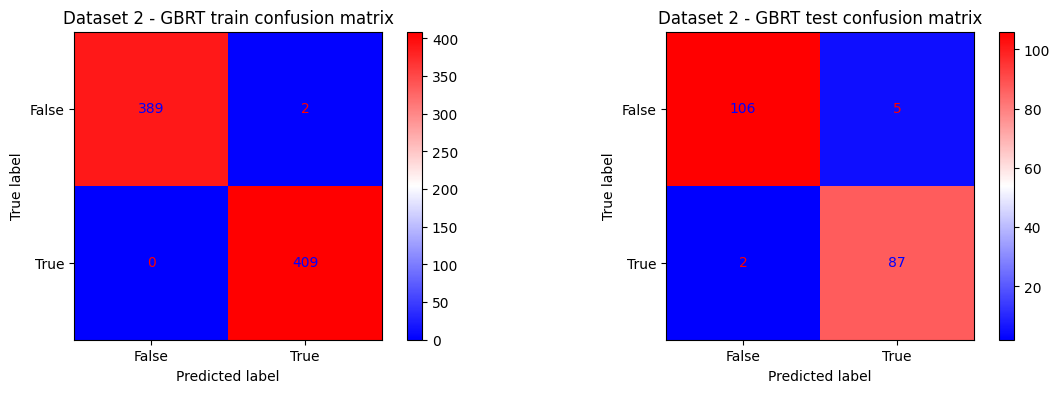

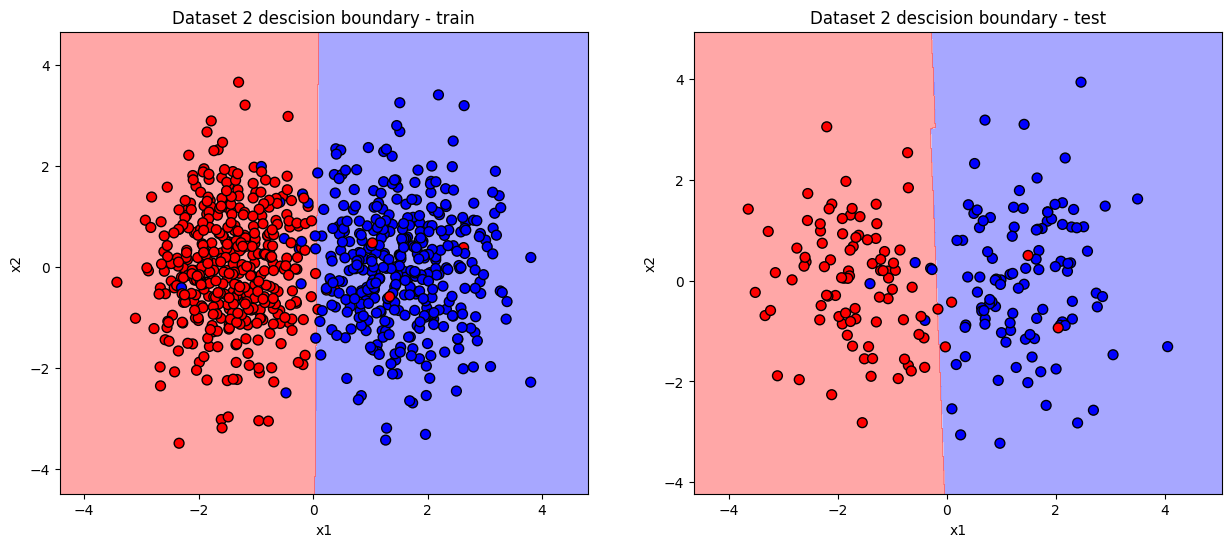

Dataset 3 - Custom GBRT Model
Train accuracy: 0.94
Test accuracy: 0.86



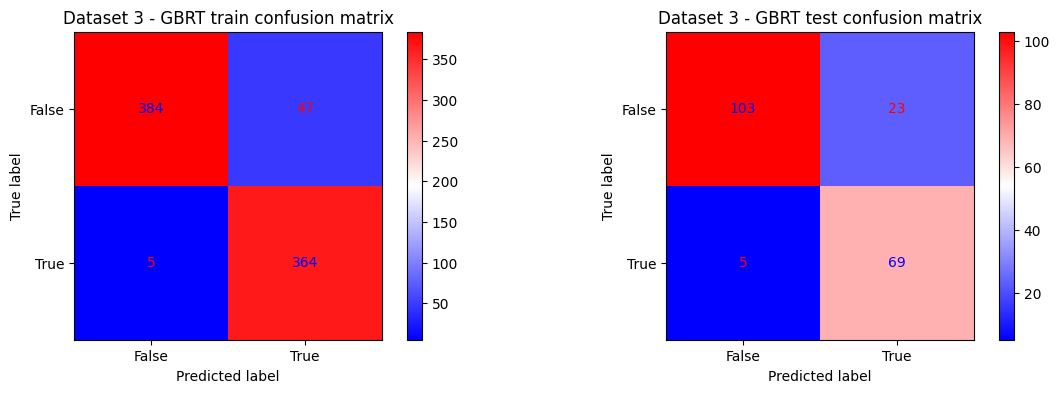

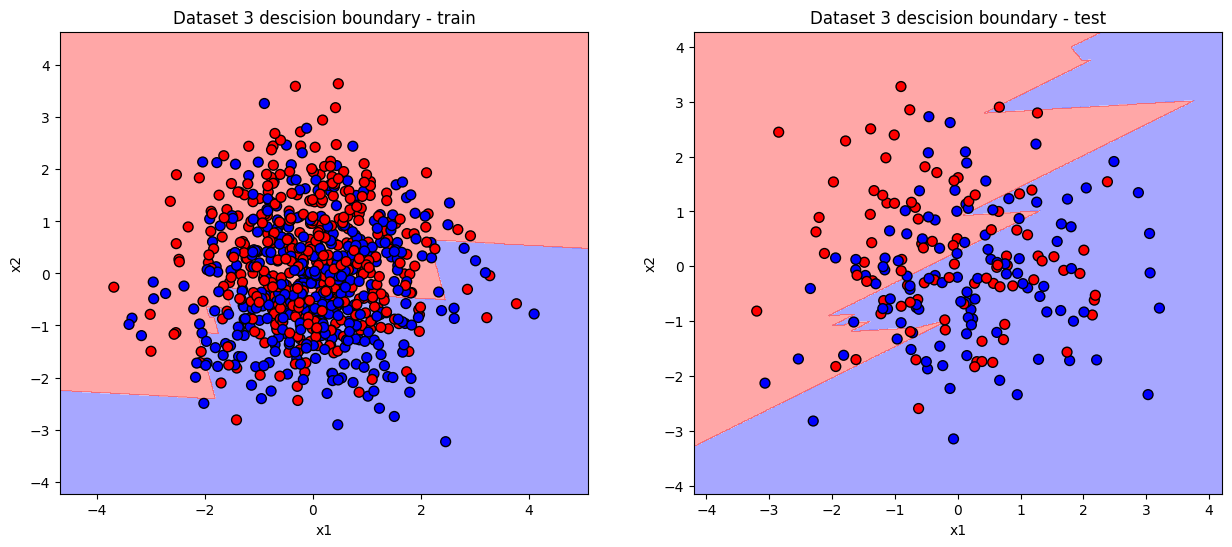

In [10]:
#  Now we train and evaluate our custom GBRT model on the three datasets: 

train_datasets = [train_data1, train_data2, train_data3]
test_datasets = [test_data1, test_data2, test_data3]
train_label_sets = [train_labels1, train_labels2, train_labels3]
test_label_sets = [test_labels1, test_labels2, test_labels3]

custom_gbrt = CustomGBRT(n_estimators=23, learning_rate=0.1, max_depth=4)

for i, (train_data, test_data, train_labels, test_labels) in enumerate(zip(train_datasets, test_datasets, train_label_sets, test_label_sets), start=1):
    custom_gbrt.fit(train_data, train_labels)
    train_pred = custom_gbrt.predict(train_data)
    test_pred = custom_gbrt.predict(test_data)
    train_accuracy = accuracy_score(train_labels, train_pred)
    test_accuracy = accuracy_score(test_labels, test_pred)
    print(f"Dataset {i} - Custom GBRT Model")
    print(f"Train accuracy: {train_accuracy:.2f}")
    print(f"Test accuracy: {test_accuracy:.2f}\n")
    
    f, axes = plt.subplots(1, 2, figsize=(14,4))
    train_confusion_matrix = confusion_matrix(train_pred, train_labels)
    train_cm_display = ConfusionMatrixDisplay(confusion_matrix = train_confusion_matrix, display_labels = [False, True])
    train_cm_display.plot(ax=axes[0], cmap = plt.cm.bwr)
    train_cm_display.ax_.set_title(f'Dataset {i} - GBRT train confusion matrix')
    
    test_confusion_matrix = confusion_matrix(test_pred, test_labels)
    test_cm_display = ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = [False, True])
    test_cm_display.plot(ax=axes[1], cmap = plt.cm.bwr)
    test_cm_display.ax_.set_title(f'Dataset {i} - GBRT test confusion matrix')
    plt.show()
    
    plt.figure(figsize=(15,6))
    ax = plt.subplot(1,2,1)
    plot_decision_boundaries(ax, train_data, train_labels, custom_gbrt, ['x1','x2'], f'Dataset {i} descision boundary - train')
    ax = plt.subplot(1,2,2)
    plot_decision_boundaries(ax, test_data, test_labels, custom_gbrt, ['x1','x2'], f'Dataset {i} descision boundary - test')
    plt.show()


## Part 2: AdaBoost
7) Implement AdaBoost

    a) Weights (𝑤 ! )

    b) Decision stump

    c) Weighted classification error (𝜖)

    d) Step size (𝛼)

    e) Boosting step

    f) Updating weights

8) Demonstrate your AdaBoost model on the datasets you generated

9) Design and perform experiments to test the performance of your model. Present and discuss the results of the experiments.


### AdaBoost Tuning & sklearn run: 

In [11]:
# Here we define a function to perform cv and hyperparameter tuning with gridsearch for AdaBoost (also using sklearn initially):

def tune_adaboost_model(train_data, train_labels):
    param_grid = {
        'n_estimators': [10, 30, 90],
        'learning_rate': [0.01, 0.1, 1]
    }
    ada = abc(estimator=DecisionTreeClassifier(max_depth=1), random_state=seed)
    grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(train_data, train_labels)
    return grid_search.best_estimator_

# And we now train and evaluate the AdaBoost (sklearn) model for each dataset:
def train_and_evaluate_adaboost(train_data, test_data, train_labels, test_labels, dataset_name):
    ada = tune_adaboost_model(train_data, train_labels)
    train_accuracy = accuracy_score(train_labels, ada.predict(train_data))
    test_accuracy = accuracy_score(test_labels, ada.predict(test_data))   
    print(f"{dataset_name} - AdaBoost sklearn Model")
    print(f"Best parameters: {ada.get_params()}")
    print(f"Train accuracy: {train_accuracy:.2f}")
    print(f"Test accuracy: {test_accuracy:.2f}\n")

train_and_evaluate_adaboost(train_data1, test_data1, train_labels1, test_labels1, 'Dataset 1')
train_and_evaluate_adaboost(train_data2, test_data2, train_labels2, test_labels2, 'Dataset 2')
train_and_evaluate_adaboost(train_data3, test_data3, train_labels3, test_labels3, 'Dataset 3')

Dataset 1 - AdaBoost sklearn Model
Best parameters: {'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 1, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': None, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.01, 'n_estimators': 30, 'random_state': 207576463}
Train accuracy: 0.99
Test accuracy: 0.98

Dataset 2 - AdaBoost sklearn Model
Best parameters: {'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 1, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity

### Manual / custom AdaBoost implementation: 

In [12]:

class CustomAdaBoost:
    def __init__(self, n_estimators=50, learning_rate=1.0):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []
        self.alphas = []

    def fit(self, X, y):
        self.models = []
        self.alphas = []
        n_samples = X.shape[0]
        y = np.where(y == 1, 1, -1)
        weights = np.ones(n_samples) / n_samples
        for _ in range(self.n_estimators):
            model = DecisionTreeClassifier(max_depth=1)
            model.fit(X, y, sample_weight=weights)
            y_pred = model.predict(X)
            weighted_error = np.sum(np.not_equal(y, y_pred) * weights)

            if weighted_error < 0.5:
                alpha = 0.5 * np.log((1 - weighted_error) / weighted_error)
                weights *= np.exp(-alpha*(y_pred*y))
                weights /= (2 * (weighted_error*(1-weighted_error)) ** 0.5)
                self.models.append(model)
                self.alphas.append(alpha)
        return self

    def predict(self, X):
        y_preds = np.array([model.predict(X) for model in self.models])
        weighted_preds = np.dot(self.alphas, y_preds)
        preds =  np.sign(weighted_preds).astype(int)
        return np.where(preds == 1, 1, 0)


    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)
    
       
    def get_params(self, deep = True):
        out = dict()
        for key in ['n_estimators', 'learning_rate']:
            value = getattr(self, key)
            out[key] = value
        return out

    def set_params(self, **params):
        if not params:
            # Simple optimization to gain speed (inspect is slow)
            return self
        valid_params = self.get_params()
    
        for key, value in params.items():
            if key not in valid_params.keys():
                raise ValueError(
                    f"Invalid parameter {key!r} for estimator {self}. "
                    f"Valid parameters are: {valid_params.keys!r}."
                )
            exec(f"self.{key}={value}")

        return self  

Dataset 1 - Custom AdaBoost Model
Train accuracy: 1.00
Test accuracy: 0.98



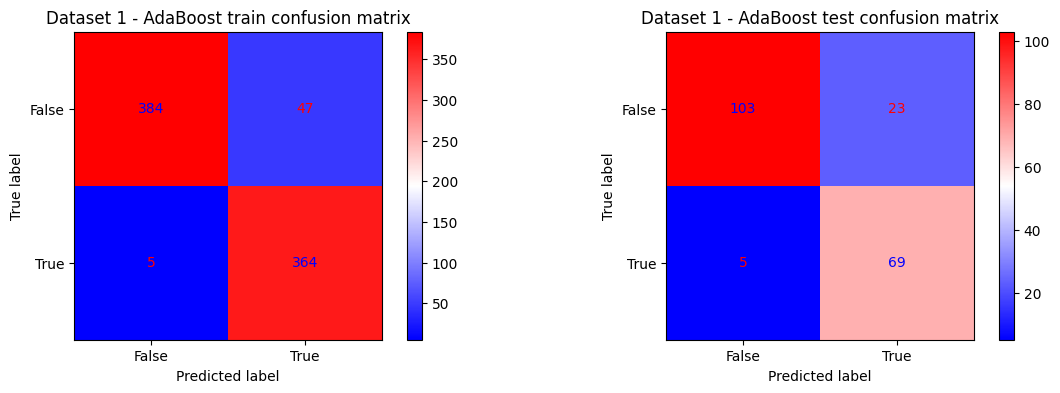

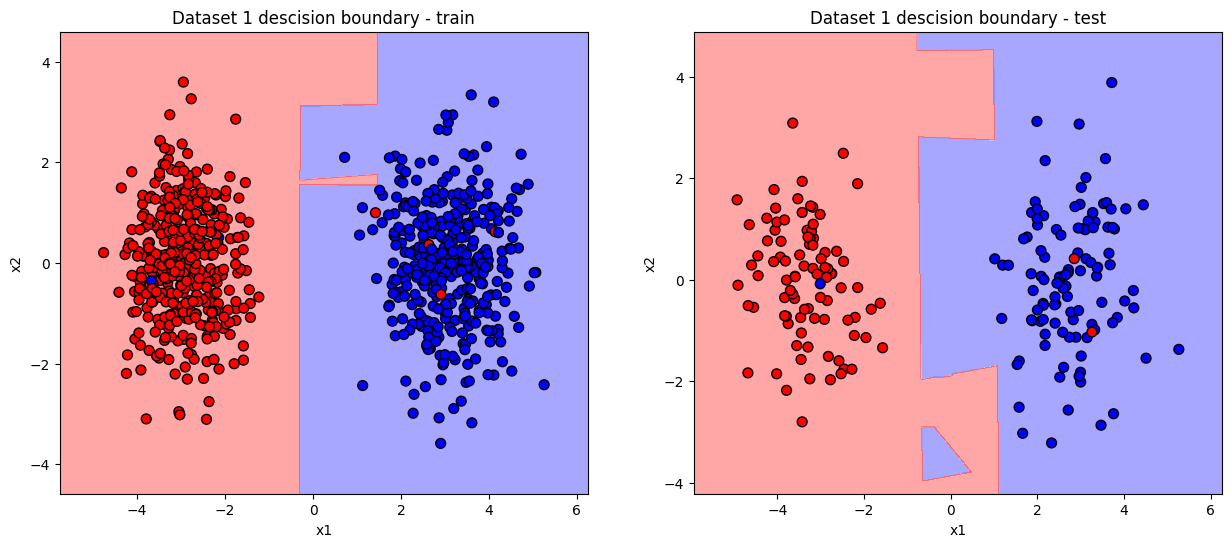

Dataset 2 - Custom AdaBoost Model
Train accuracy: 1.00
Test accuracy: 0.97



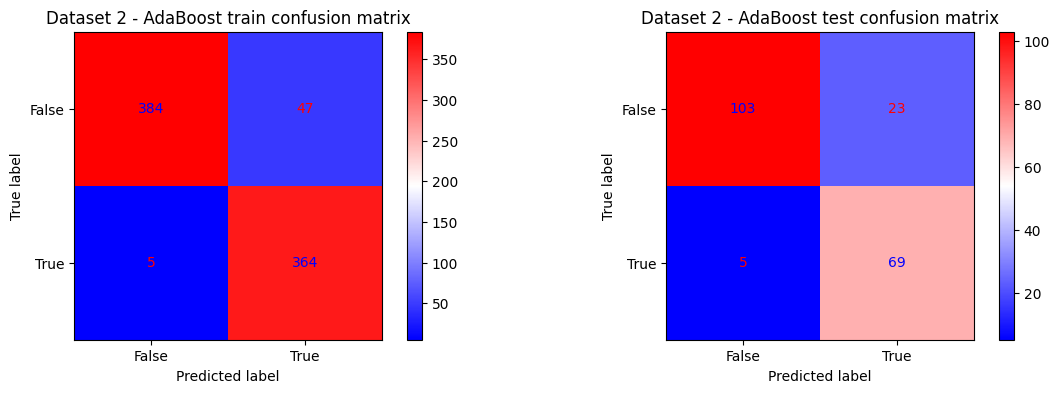

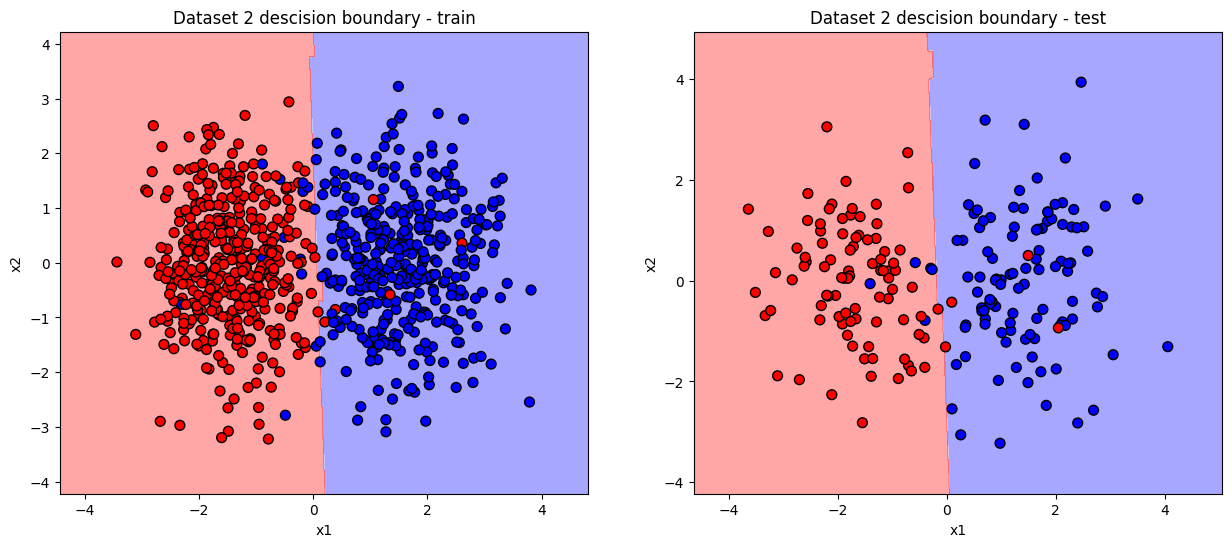

Dataset 3 - Custom AdaBoost Model
Train accuracy: 0.80
Test accuracy: 0.72



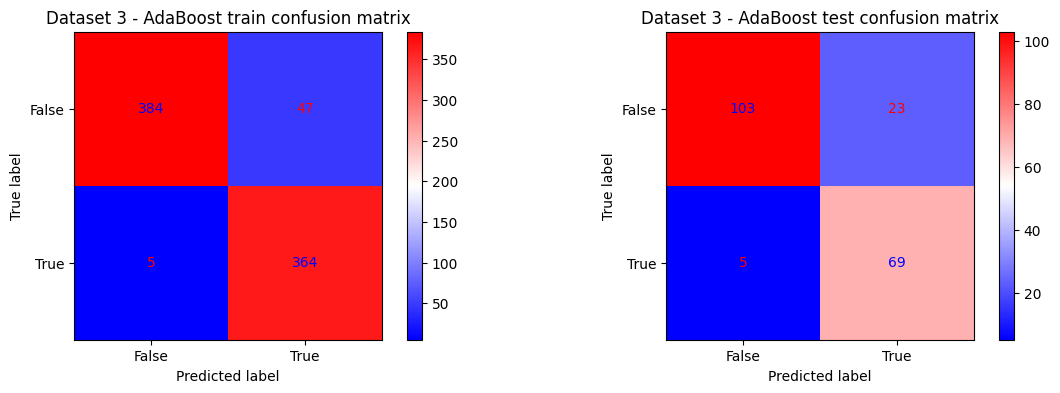

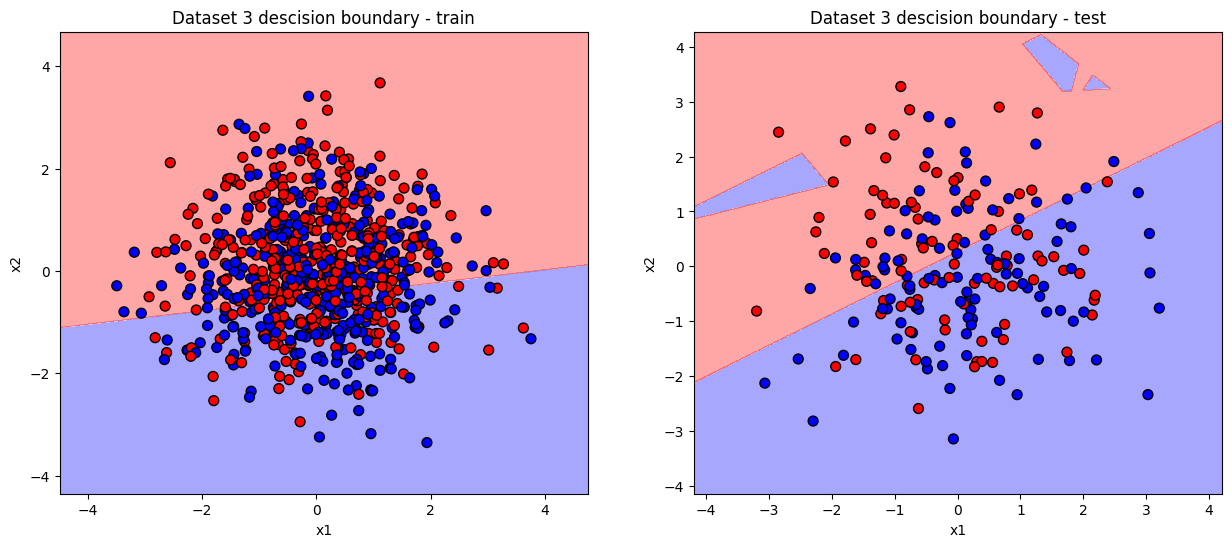

In [13]:
# Now we train and evaluate our manual/custom AdaBoost model on the three datasets: 

custom_adaboost = CustomAdaBoost(n_estimators=85, learning_rate=0.1)

for i, (train_data, test_data, train_labels, test_labels) in enumerate(zip(train_datasets, test_datasets, train_label_sets, test_label_sets), start=1):
    custom_adaboost.fit(train_data, train_labels)
    train_accuracy = accuracy_score(train_labels, custom_adaboost.predict(train_data))
    test_accuracy = accuracy_score(test_labels, custom_adaboost.predict(test_data))
    print(f"Dataset {i} - Custom AdaBoost Model")
    print(f"Train accuracy: {train_accuracy:.2f}")
    print(f"Test accuracy: {test_accuracy:.2f}\n")
    
    f, axes = plt.subplots(1, 2, figsize=(14,4))
    train_confusion_matrix = confusion_matrix(train_pred, train_labels)
    train_cm_display = ConfusionMatrixDisplay(confusion_matrix = train_confusion_matrix, display_labels = [False, True])
    train_cm_display.plot(ax=axes[0], cmap = plt.cm.bwr)
    train_cm_display.ax_.set_title(f'Dataset {i} - AdaBoost train confusion matrix')
    
    test_confusion_matrix = confusion_matrix(test_pred, test_labels)
    test_cm_display = ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = [False, True])
    test_cm_display.plot(ax=axes[1], cmap = plt.cm.bwr)
    test_cm_display.ax_.set_title(f'Dataset {i} - AdaBoost test confusion matrix')
    plt.show()

    plt.figure(figsize=(15,6))
    ax = plt.subplot(1,2,1)
    plot_decision_boundaries(ax, train_data, train_labels, custom_adaboost, ['x1','x2'], f'Dataset {i} descision boundary - train')
    ax = plt.subplot(1,2,2)
    plot_decision_boundaries(ax, test_data, test_labels, custom_adaboost, ['x1','x2'], f'Dataset {i} descision boundary - test')
    plt.show()

## Part 3: Report Prep - Analysis

### Bias and Variance Analysis (Attempt):
- We tried using learning curves to analyze the bias and variance of the models. 
- We train the models with different amounts of training data and recorded the training and validation accuracies
- but this experiment ultimately failed and didn't show anything sensible 

### Convergence Rate Analysis:
- In the section that follows, we calculate the training and testing error rates as a function of the number of iterations for both custom GBRT and AdaBoost models. 
- By visualizing the convergence rate, we can assess the models' performance and make informed decisions about the appropriate number of iterations required to reach acceptable error rates.
- Importantly, the convergence rate also speaks to the effectiveness and utility of the enseemble learning methods, so comparing the convergence rates is useful in evaluating the utility of each approach relative to the alternatives.  

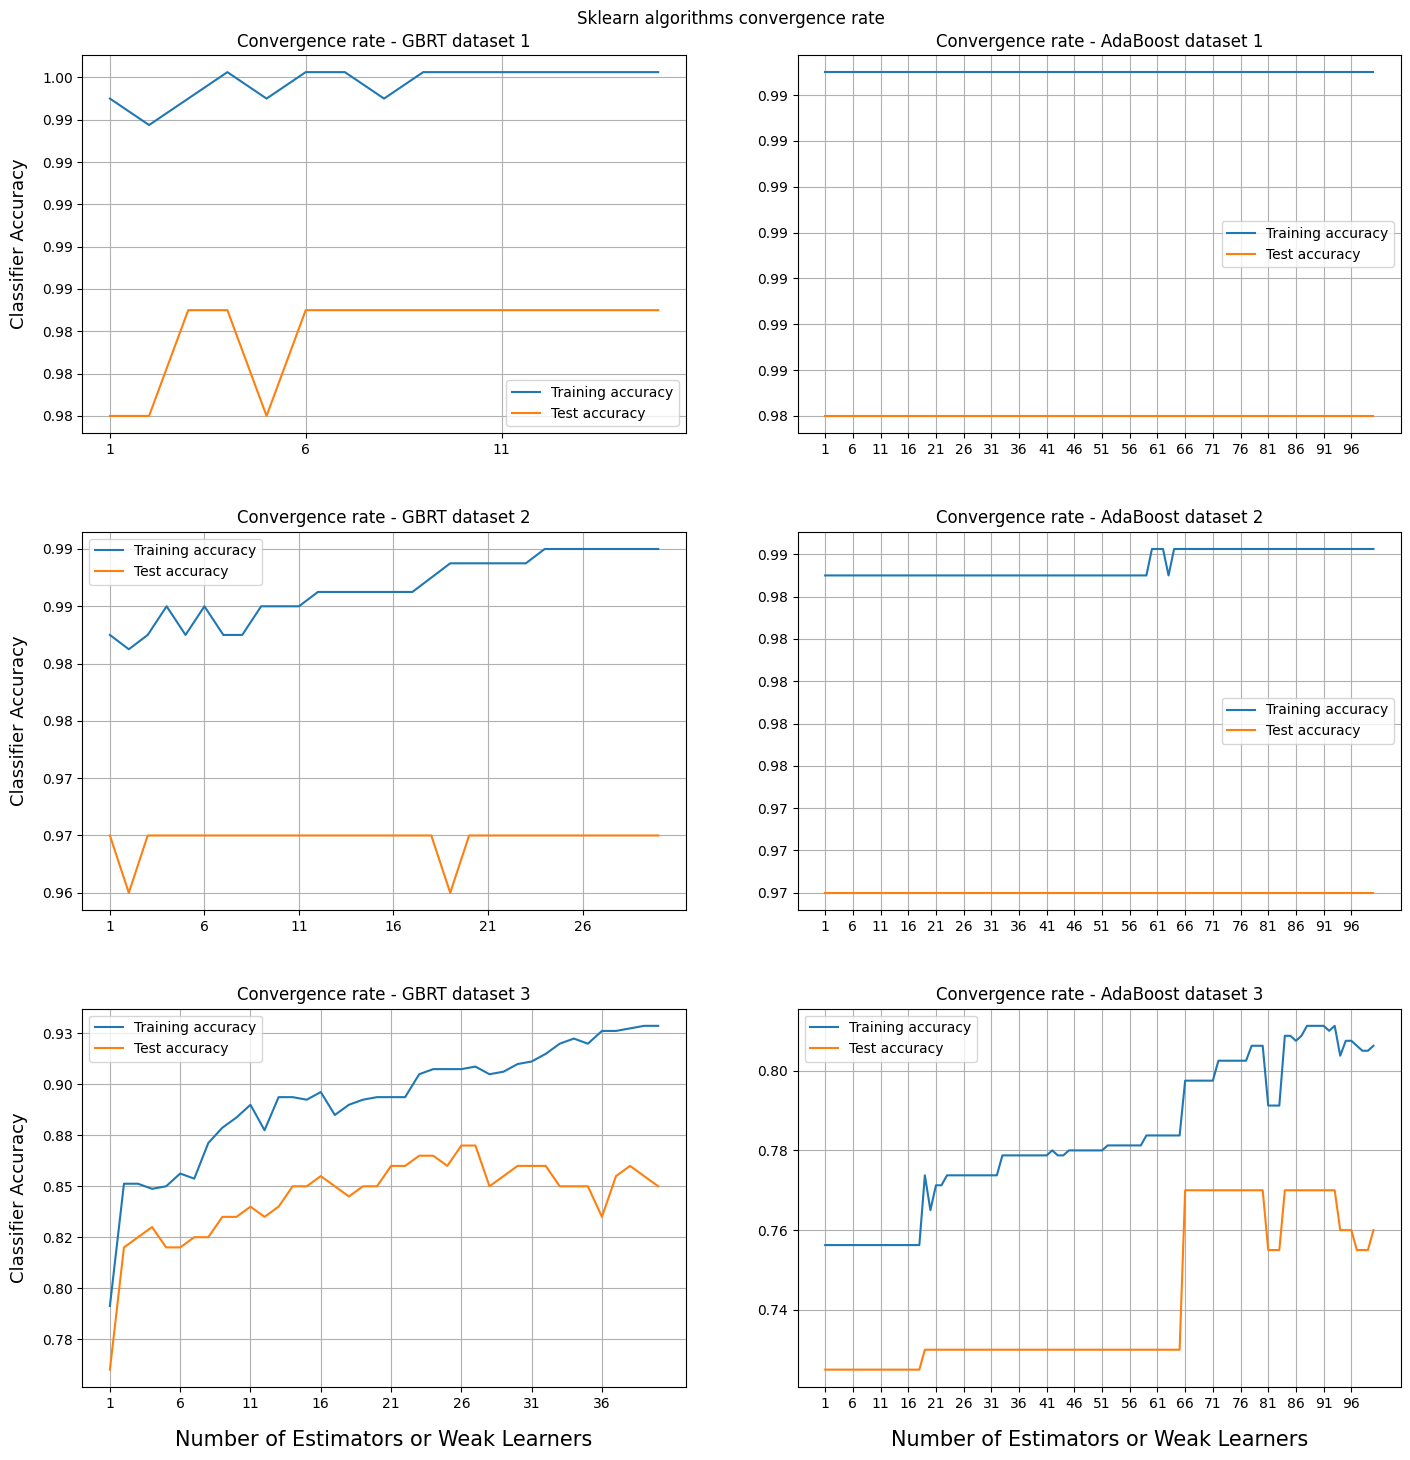

In [21]:
def plot_convergence(pos, model, X_train, y_train, X_test, y_test, n_iterations, title):
    train_accs, test_accs, train_errors, test_errors = [], [], [], []

    if model == 'GBRT':
        model = gbc(n_estimators=20, learning_rate=0.1, max_depth=3)
    else:
        model = abc(n_estimators=20, learning_rate=0.1)

    for n in range(1, n_iterations + 1):
        
        model.set_params(**{'n_estimators': n})
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        train_accuracy = accuracy_score(y_train, train_pred)
        test_accuracy = accuracy_score(y_test, test_pred)

        train_accs.append(train_accuracy)
        test_accs.append(test_accuracy)
        train_errors.append(1 - train_accuracy)
        test_errors.append(1 - test_accuracy)
    
    pos.plot(range(1, n_iterations + 1), train_accs, label='Training accuracy')
    pos.plot(range(1, n_iterations + 1), test_accs, label='Test accuracy')
    if pos in [axes[2,0], axes[2,1]]:
        pos.set_xlabel('Number of Estimators or Weak Learners', fontsize=15, labelpad=14)
    if pos in [axes[0,0], axes[1,0], axes[2,0]]:
        pos.set_ylabel('Classifier Accuracy', fontsize=13, labelpad=10)
    pos.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    pos.set_xticks(range(1, n_iterations + 1, 5))
    pos.set_title(f'Convergence rate - {title}')
    pos.legend()
    pos.grid()

fig, axes = plt.subplots(3, 2, figsize=(15,15))
fig.tight_layout(pad=5)
fig.suptitle('Sklearn algorithms convergence rate')

plot_convergence(axes[0,0], 'GBRT', train_data1, train_labels1, test_data1, test_labels1, 15, 'GBRT dataset 1')
plot_convergence(axes[0,1], 'Adaboost', train_data1, train_labels1, test_data1, test_labels1, 100, 'AdaBoost dataset 1')
plot_convergence(axes[1,0], 'GBRT', train_data2, train_labels2, test_data2, test_labels2, 30, 'GBRT dataset 2')
plot_convergence(axes[1,1], 'Adaboost', train_data2, train_labels2, test_data2, test_labels2, 100, 'AdaBoost dataset 2')
plot_convergence(axes[2,0], 'GBRT', train_data3, train_labels3, test_data3, test_labels3, 40, 'GBRT dataset 3')
plot_convergence(axes[2,1], 'Adaboost', train_data3, train_labels3, test_data3, test_labels3, 100, 'AdaBoost dataset 3')
plt.show()


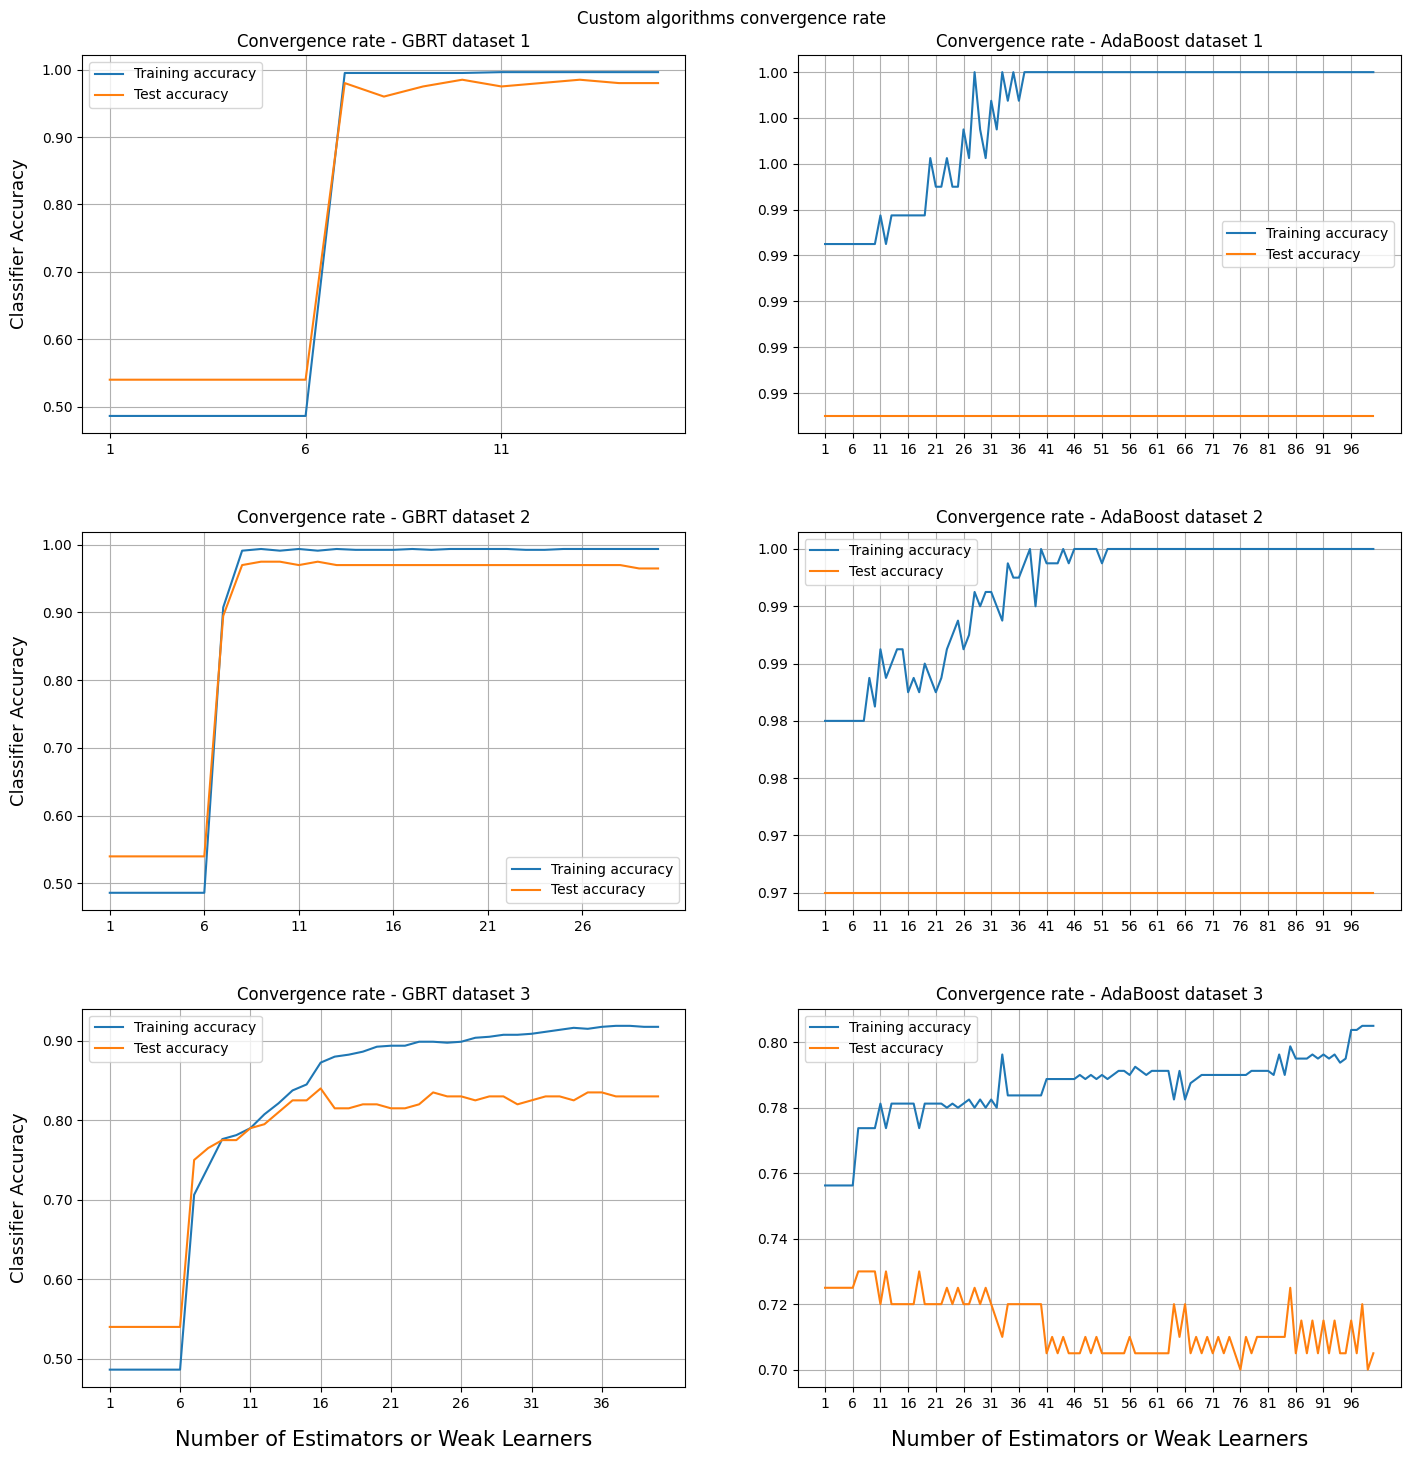

In [22]:
def plot_convergence(pos, model, X_train, y_train, X_test, y_test, n_iterations, title):
    train_accs, test_accs, train_errors, test_errors = [], [], [], []

    if model == 'GBRT':
        model = CustomGBRT(n_estimators=20, learning_rate=0.1, max_depth=3)
    else:
        model = CustomAdaBoost(n_estimators=20, learning_rate=0.1)

    for n in range(1, n_iterations + 1):
        
        model.set_params(**{'n_estimators': n})
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        train_accuracy = accuracy_score(y_train, train_pred)
        test_accuracy = accuracy_score(y_test, test_pred)

        train_accs.append(train_accuracy)
        test_accs.append(test_accuracy)
        train_errors.append(1 - train_accuracy)
        test_errors.append(1 - test_accuracy)
    
    pos.plot(range(1, n_iterations + 1), train_accs, label='Training accuracy')
    pos.plot(range(1, n_iterations + 1), test_accs, label='Test accuracy')
    if pos in [axes[2,0], axes[2,1]]:
        pos.set_xlabel('Number of Estimators or Weak Learners', fontsize=15, labelpad=14)
    if pos in [axes[0,0], axes[1,0], axes[2,0]]:
        pos.set_ylabel('Classifier Accuracy', fontsize=13, labelpad=10)
    pos.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    pos.set_xticks(range(1, n_iterations + 1, 5))
    pos.set_title(f'Convergence rate - {title}')
    pos.legend()
    pos.grid()

fig, axes = plt.subplots(3, 2, figsize=(15,15))
fig.tight_layout(pad=5)
fig.suptitle('Custom algorithms convergence rate')

plot_convergence(axes[0,0], 'GBRT', train_data1, train_labels1, test_data1, test_labels1, 15, 'GBRT dataset 1')
plot_convergence(axes[0,1], 'Adaboost', train_data1, train_labels1, test_data1, test_labels1, 100, 'AdaBoost dataset 1')
plot_convergence(axes[1,0], 'GBRT', train_data2, train_labels2, test_data2, test_labels2, 30, 'GBRT dataset 2')
plot_convergence(axes[1,1], 'Adaboost', train_data2, train_labels2, test_data2, test_labels2, 100, 'AdaBoost dataset 2')
plot_convergence(axes[2,0], 'GBRT', train_data3, train_labels3, test_data3, test_labels3, 40, 'GBRT dataset 3')
plot_convergence(axes[2,1], 'Adaboost', train_data3, train_labels3, test_data3, test_labels3, 100, 'AdaBoost dataset 3')
plt.show()


## Part 4: Report - Summary & Conclusions: 

In this task we implemented both GBRT (Gradient Boosted Regression Trees) and Adaboost (Adaptive Boosting), two popular machine learning algorithms used for regression and classification tasks. 

GBRT is an ensemble method that combines multiple decision trees to create a powerful predictive model. It builds trees in a sequential manner, where each subsequent tree is trained to correct the mistakes made by the previous trees. This iterative process reduces the overall error and improves the model's accuracy. GBRT is known for its ability to handle complex relationships and capture non-linear patterns in the data.

Adaboost, on the other hand, is a boosting algorithm that combines weak learners (typically decision trees) to create a strong classifier. In Adaboost, each weak learner is trained on a modified version of the dataset, where more weight is given to the misclassified instances from the previous iterations. The final prediction is made by combining the predictions of all the weak learners, weighted by their accuracy. Adaboost is particularly effective in situations where the weak learners are only slightly better than random guessing.

While both GBRT and Adaboost are ensemble methods and involve combining multiple weak learners, there are several key differences between them:

1. Training Process: GBRT builds trees sequentially by minimizing a loss function at each step, correcting the mistakes made by previous trees by updating the residuals, while Adaboost modifies the weights of the instances to emphasize the misclassified ones in subsequent iterations.

2. Weak Learners: GBRT typically uses decision trees as weak learners, whereas Adaboost can use any weak classifier (e.g., decision trees, SVMs, or neural networks).

3. Error Correction: GBRT corrects the mistakes made by the previous trees by updating the residuals, while Adaboost focuses on the misclassified instances by adjusting their weights.

4. Complexity: GBRT can capture complex relationships and handle non-linear patterns, making it suitable for a wide range of tasks. Adaboost, on the other hand, is generally simpler and may struggle with highly complex datasets.

#### GBRT Advantages & Shortfalls: 
- Advantages: GBRT models are generally more accurate, as they minimize a loss function iteratively by fitting trees on the residuals. They can effectively handle mixed data types and handle missing data well. GBRT can also be easily parallelized, improving efficiency.
<br><br>
- Shortfalls: GBRT models can be sensitive to hyperparameters and require more tuning. The models may overfit if the number of iterations or depth of the trees is too large. Additionally, the sequential nature of boosting makes it harder to parallelize compared to bagging methods.

#### AdaBoost Advantages & Shortfalls: 
- Advantages: AdaBoost models are relatively simple and easy to implement. They are less prone to overfitting and can achieve good generalization with appropriate hyperparameter choices. AdaBoost models can perform well even with weak classifiers and can be easily parallelized, enhancing efficiency.
<br><br>
- Shortfalls: AdaBoost models can be sensitive to noisy data and outliers, which can lead to degraded performance. They can also be slower to train due to the sequential nature of the algorithm.

#### Hyperparameters and step-size $\alpha$:
- Hyperparameters: In both GBRT and AdaBoost, the choice of hyperparameters such as the number of estimators, learning rate, and tree depth all impacted model performance. In our experiments, we chose hyperparameters based on their general effectiveness in practice and our parameter tuner, which allowed for fair comparisons between our custom models and the sklearn model classes. 
<br><br>
- Step-size / $\alpha$: In AdaBoost, $\alpha$ determines the weight of the weak classifier in the final ensemble. Larger alpha $\alpha$ values lead to more aggressive boosting, which has the potential to lead to overfitting, while smaller alpha $\alpha$ values can result in underfitting if the alpha used is too small. It's for these reasons that choosing an appropriate $\alpha$ is essential to balance the all-important trade-off between underfitting and overfitting. 

In order to evaluate our algorithms, we created three datasets for experimentation and testing, with 20 features and 1000 samples each, and distinguished in order of separability of the clusters of labels, with the first dataset being relatively easy to separate, the second dataset being moderate, and the third dataset being very difficult to separate clusters with lots of overlap. 

We ran both GBRT and AdaBoost using the sklearn classes, but for robustness, also created our own manual or custom GBRT and AdaBoost models. To ensure the correctness of our custom implementations and improve interpretability, we compared our results to those from the sklearn libraries, and generated the following results:

In [16]:
skGBRT = [0.99, 0.98, 0.99, 0.97, 0.91, 0.84]
custGBRT = [1.00, 0.98, 1.00, 0.96, 0.94, 0.86]
skADA = [0.99, 0.98, 0.99, 0.97, 0.81, 0.77]
customADA = [0.99, 0.98, 0.98, 0.97, 0.8, 0.72]
labels = ["Dataset1_Train", "Dataset1_Test", "Dataset2_Train", "Dataset2_Test", "Dataset3_Train", "Dataset3_Test"]

results_list = [skGBRT, custGBRT, skADA, customADA]

df_results =  pd.DataFrame(results_list, columns=labels)
df_results.index = ['sklearn_GBRT', 'custom_GBRT','sklearn_AdaBoost', 'custom_AdaBoost']
print(tabulate(df_results, headers='keys', tablefmt='psql'))

+------------------+------------------+-----------------+------------------+-----------------+------------------+-----------------+
|                  |   Dataset1_Train |   Dataset1_Test |   Dataset2_Train |   Dataset2_Test |   Dataset3_Train |   Dataset3_Test |
|------------------+------------------+-----------------+------------------+-----------------+------------------+-----------------|
| sklearn_GBRT     |             0.99 |            0.98 |             0.99 |            0.97 |             0.91 |            0.84 |
| custom_GBRT      |             1    |            0.98 |             1    |            0.96 |             0.94 |            0.86 |
| sklearn_AdaBoost |             0.99 |            0.98 |             0.99 |            0.97 |             0.81 |            0.77 |
| custom_AdaBoost  |             0.99 |            0.98 |             0.98 |            0.97 |             0.8  |            0.72 |
+------------------+------------------+-----------------+------------------+

#### Final Thoughts: 
As the above results demonstrate, the models had a harder time with the overlapping less-separated label clusters in dataset 3, particularly AdaBoost, where accuracy dropped from nearly perfect to somewhere in the 70s. Also of note is that the AdaBoost models (both sklearn and our own custom version) showed little to no sensitivity to changing the n_estimators parameter, or number of weak learners, which is puzzling. Aside from that, GBRT performed better overall than AdaBoost, though that is largely influenced by AdaBoost falling well short on dataset 3, which may or may not have been related to the issue with lack of sensitivity to n_estimator mentioned above. 